# Desafio Final- Etapa 1

In [27]:
#importando as bibliotecas
import pandas as pd              #Permite carregar e tratar os arquivos
import matplotlib.pyplot as plt  #Gera visualizações gráficas
import numpy as np               #Operações matemáticas
import seaborn as sns            #Gera visualizações gráficas
import os                        #Gerenciar o sistema operacional

caminhoPasta= './Arquivos/vendas/'

os.listdir(caminhoPasta)

#Criar uma lista vazia para salvar o caminho
diretorios=[]

#Laço de repetição (é usado para localizar os arquivos do diretório)

for file in os.listdir(caminhoPasta): 
    #print(caminhoPasta+file)
    if file.endswith('.xlsx'):
         diretorios.append(caminhoPasta+file)
    
#diretorios

#Criar um dataframe vazio
df_final = pd.DataFrame()

#Abrir os documentos e agrupar em um unico dataframe
for path in diretorios:
    df= pd.read_excel(path)
    df_final= pd.concat([df_final,df])

#Salvar o DataFrame como CSV na sua pasta

df_final.to_csv('./Arquivos/ArquivoCombinado.csv')

In [28]:
Dimensoes= 'C:\\Users\\FIC\\Documents\\Desafio_Python_Gabrielly_Holanda\\Arquivos\\Dimensões.xlsx'

dfCliente= pd.read_excel((Dimensoes),sheet_name='Cliente')
dfProduto= pd.read_excel((Dimensoes),sheet_name='Produto')
dfGrupoProduto= pd.read_excel((Dimensoes),sheet_name='GrupoProduto')
dfVendedor= pd.read_excel((Dimensoes),sheet_name='Vendedor')
dfData= pd.read_excel((Dimensoes),sheet_name='Data')

dfMetas= pd.read_excel('./Arquivos/base-meta-new.xlsx')

dfMetas=dfMetas.iloc[3:,1:]

dfMetas.reset_index(0, #inicio do ID
                    drop=True, #Remove a coluna de ID existente (que não inicia com 0)
                    inplace=True) #Aplica as alterações no objeto- modifica o daraframe sem a necessidade criar um novo

#Renomear as colunas do DataFrame
dfMetas.columns=['cdVendedor','data','meta']

dfCliente.columns=['cdCliente','razão_social','status','categoria','cidade','uf']
dfProduto.columns=['cdProduto','descrição','cdGrupo']
dfGrupoProduto.columns=['cdGrupo','grupo','linha']
dfVendedor.columns=['cdVendedor','vendedor','cdSupervisor','supervisor','cdGerente','gerente','equipe']
dfData.columns=['data','ano','mes','mesNum','dia']

In [29]:
#dfMetas.head()
#dfCliente.head()
#dfProduto.head()
#dfGrupoProduto.head()
#dfVendedor.head()
dfData.head()
#df_final.head()

,data,ano,mes,mesNum,dia
0,2017-01-01,2017,Janeiro,1,1
1,2017-01-02,2017,Janeiro,1,2
2,2017-01-03,2017,Janeiro,1,3
3,2017-01-04,2017,Janeiro,1,4
4,2017-01-05,2017,Janeiro,1,5


In [30]:
dfMetas.info()
#dfCliente.info()
#dfProduto.info()
#dfGrupoProduto.info()
#dfVendedor.info()
#dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cdVendedor  792 non-null    object
 1   data        792 non-null    object
 2   meta        792 non-null    object
dtypes: object(3)
memory usage: 18.7+ KB


In [31]:
#dfMetas.describe()
#dfCliente.describe()
#dfProduto.describe()
#dfGrupoProduto.describe()
dfVendedor.describe()
#dfData.describe()

,cdVendedor,cdSupervisor,cdGerente
count,12.000000,12.00000,12.000000
mean,280.333333,35.00000,1.500000
std,190.782281,13.31438,0.522233
min,102.000000,15.00000,1.000000
25%,173.250000,25.00000,1.000000
50%,205.500000,32.50000,1.500000
75%,295.250000,40.00000,2.000000
max,669.000000,55.00000,2.000000


# Análises Exploratórias

Valor total vendido e Valor total da meta por ano?

In [32]:
#Adicionar a coluna valor total ao dataframe

df_final['valorTotal']= df_final['QtdItens']*df_final['ValorUnitario']
df_final.head()

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,valorTotal
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,52.98
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,26.64
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,9.60
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,17.52
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,16.86


In [33]:
df_final[['valorTotal','QtdItens']].sum()

valorTotal    21047835.52
QtdItens       7428139.00
dtype: float64

In [34]:
sum(df_final['QtdItens'])

7428139

In [35]:
df_result= pd.merge(
                df_final[['DataEmissao','QtdItens','ValorUnitario','valorTotal']],
                dfData[['data','ano','mesNum']],
                left_on='DataEmissao',
                right_on='data'
                    )

#Agrupar os dados por ano, somando a coluna valor total

df_result= df_result[['ano','valorTotal']].groupby('ano').sum().reset_index()

    ano   valorTotal
0  2017   6648222.05
1  2018  10214809.43
2  2019   1046201.01


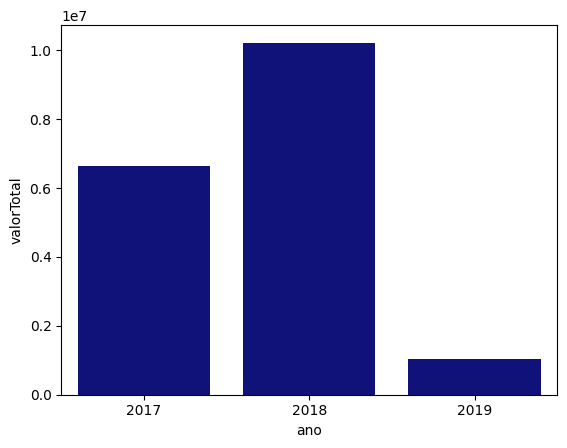

In [36]:
#Gerar um gráfico de barras para apresentar as vendas

sns.barplot(
    data= df_result,
    x='ano',
    y='valorTotal',
    color='darkblue'
    )

print(df_result)

In [37]:
#Converter o tipo de dado da coluna data na tabela metas
dfMetas['data']= dfMetas['data'].astype('datetime64[ns]')

dfMetas['meta']= dfMetas['meta'].astype('float')

df_finalMeta= pd.merge(
                    dfMetas[['data','meta']],
                    dfData[['data','ano']],
                    left_on='data',
                    right_on='data'
                    )

df_finalMeta = df_finalMeta[['ano','meta']].groupby('ano').sum().reset_index()
df_finalMeta 

,ano,meta
0,2017,1.174900e+07
1,2018,1.208240e+07
2,2019,1.075291e+07


    ano          meta
0  2017  1.174900e+07
1  2018  1.208240e+07
2  2019  1.075291e+07


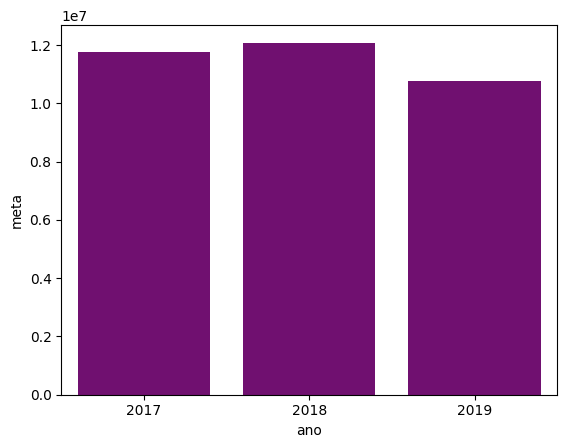

In [38]:
#Gerar um gráfico de barras para apresentar AS METAS

sns.barplot(
    data= df_finalMeta ,
    x='ano',
    y='meta',
    color='purple'
        )

print(df_finalMeta)

### Crie um gráfico de linhas para exibir o comportamento das vendas ao longo do ano de 2018.

In [43]:
df_result= df_final[
        (df_final['DataEmissao']>= '2018-01-01')&
        (df_final['DataEmissao']<='2018-12-31')
        ]

df_result


,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,valorTotal
0,2018-01-01,2018-02-02,1822917,3787277,196,1154,6,3.11,0.30,18.66
1,2018-01-01,2018-02-12,1748367,673368,265,1154,6,3.11,0.30,18.66
2,2018-01-01,2018-01-27,1791138,671829,215,1154,6,3.04,1.26,18.24
3,2018-01-01,2018-01-16,1834054,2851340,125,1527,6,2.80,0.69,16.80
4,2018-01-01,2018-02-02,1822917,3787277,196,1527,6,3.00,0.69,18.00
...,...,...,...,...,...,...,...,...,...,...
154249,2018-12-31,2019-01-21,2118788,5269032,215,2445,24,1.55,6.18,37.20
154250,2018-12-31,2019-01-21,2118788,5269032,215,1769,12,4.13,2.37,49.56
154251,2018-12-31,2019-02-08,2170237,4896358,215,260,12,2.24,0.30,26.88
154252,2018-12-31,2019-02-02,2118474,672947,215,1527,12,2.92,0.30,35.04


In [44]:
df_result= pd.merge(
                    df_result[['DataEmissao','QtdItens']],
                    dfData[['data','mes','mesNum']],
                    left_on='DataEmissao',
                    right_on='data'
                    )


df_result = df_result[['mes','mesNum','QtdItens']].groupby(['mes','mesNum']).sum().sort_values(by='mesNum').reset_index()
df_result 

,mes,mesNum,QtdItens
0,Janeiro,1,208251
1,Fevereiro,2,172067
2,Março,3,253693
3,Abril,4,225216
4,Maio,5,254746
5,Junho,6,256555
6,Julho,7,311472
7,Agosto,8,394983
8,Setembro,9,477545
9,Outubro,10,486056


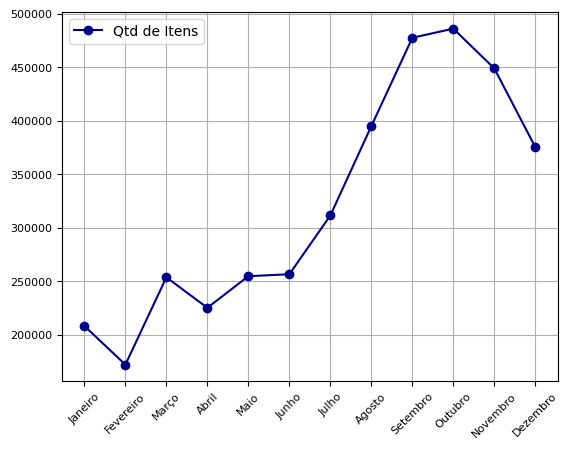

In [48]:
plt.plot(
    df_result['mes'],
    df_result['QtdItens'],
    label= 'Qtd de Itens',
    marker= 'o',
    color='darkblue',
    )

#Alterar os rótulos dos eixos 
plt.xticks(fontsize=8,rotation=45)
plt.yticks(fontsize=8)

#Adioconar legenda ao gráfico
plt.legend()
plt.grid()

#Salvar Gráfico
plt.savefig('./Arquivos/')



### Quantos clientes ativos e inativos temos em nossa empresa?